In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ConfusionMatrix


In [3]:
credito = pd.read_csv('Credit.csv')
credito.shape


(1000, 21)

In [5]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [6]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values


In [11]:
#transformando variaveis categóricas em numéricas
for i in range (0,20):
    lencoder = LabelEncoder()
    if type(previsores[0,i]) == str:
        previsores[:,i] = lencoder.fit_transform(previsores[:,i])



In [14]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores,classe,test_size=0.3, 
                                        random_state=0)

x_teste


array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_treino,y_treino)




GaussianNB()

In [16]:
previsoes = naive_bayes.predict(x_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [17]:
confusao = confusion_matrix(y_teste,previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [21]:
TA = accuracy_score(y_teste,previsoes)
print('Acurácia: %.2f%%' % (TA*100))
print('taxa de erro: %.2f%%' % ((1-TA)*100))    

Acurácia: 71.00%
taxa de erro: 29.00%


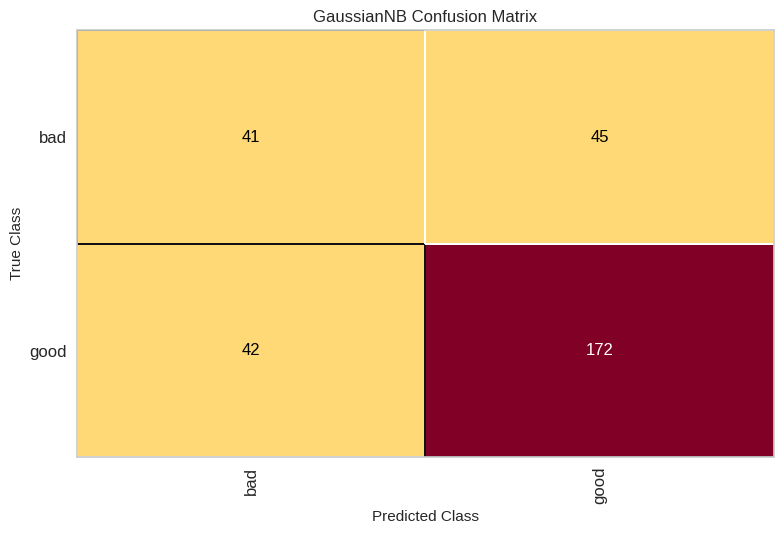

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [26]:
#visualizando a matriz de confusão
vis = ConfusionMatrix(GaussianNB())
vis.fit(x_treino, y_treino)
vis.score(x_teste, y_teste)
vis.show()

In [29]:
new_credito = pd.read_csv('NovoCredit.csv')
new_credito.shape

(1, 20)

In [30]:
new_credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [31]:
new_credito = new_credito.iloc[:,0:20].values
for i in range (0,20):
    lencoder = LabelEncoder()
    if type(new_credito[0,i]) == str:
        new_credito[:,i] = lencoder.fit_transform(new_credito[:,i])

In [32]:
naive_bayes.predict(new_credito)

array(['good'], dtype='<U4')